<a href="https://colab.research.google.com/github/thiagonoobre/Projeto_Analise_Exploratoria_-LOGGIBUD/blob/main/Projeto_Analise_Exploratoria__LOGGIBUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROJETO ANÁLISE EXPLORATÓRIA LOGGIBUD



Nesse projeto estaremos trabalhando com dos dados da Loggi Benchmark for Urban Deliveries (BUD) que está localizado no repositório do GitHub ([link](https://github.com/loggi/loggibud)). A Loggi como empresa de logistica enfretam desafios, sendo eles a otimização das rotas de entregas, alocação de entregas nos veículos da frota com capacidade limitada, alocação de produtos nos **hubs** próximos ao endereço de entrega, etc.   

 A imagem nos mostra em **azul** os pontos de entrega e em **vermelho** o hub de distribuição. Isso revela a complexidade das operações logísticas da Loggi. A empresa enfrenta diariamente desafios como a necessidade de entregar milhares de pedidos em prazos cada vez mais curtos, a gestão de uma frota diversificada e a ocorrência de imprevistos como o trânsito e as condições climáticas adversas. Esses fatores podem levar a atrasos nas entregas, aumento dos custos operacionais e perda de clientes.

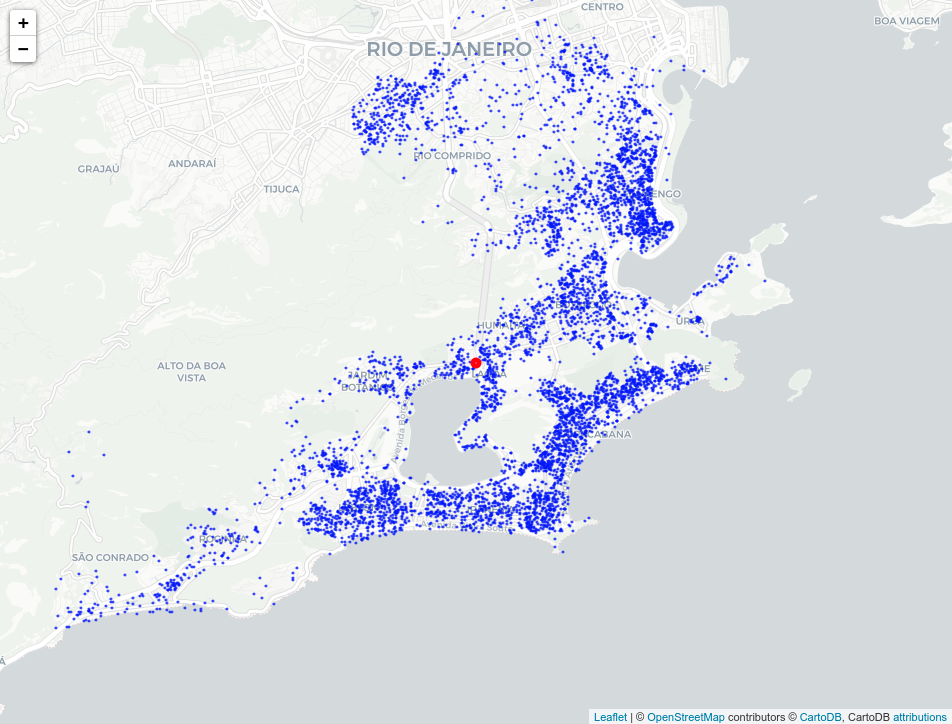

### 1\. Clonando o Repositório

Nesse momento teremos que trazer a base de dados para o colab para que possamos tratar e trabalhar esses dados nos seguintes passos:
- Clonar a base de dados loggibud dentro do repositório do git hub
- Acessar a pasta onde está a bade de dados
- Baixar a base de dados comlidada
- Verificar e acessar a bade de dados

In [ ]:
# Clone o repositório
# Se você tiver usando o colab você verificar que em ARQUIVOS o clone do repositório
# ATENÇÃO:  Não foi possivel clona o repositório no kaggle, informando a falta de autorização
!git clone https://github.com/loggi/loggibud

Cloning into 'loggibud'...
remote: Enumerating objects: 1025, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1025 (delta 2), reused 5 (delta 1), pack-reused 1014 (from 1)
Receiving objects: 100% (1025/1025), 34.54 MiB | 18.49 MiB/s, done.
Resolving deltas: 100% (527/527), done.


In [ ]:
# Acesse a pasta com o código
%cd /content/loggibud/
!ls  # verifica os arquivos do projeto

/content/loggibud
data  figures  loggibud     pyproject.toml  requirements.txt
docs  LICENSE  poetry.lock  README.md	    tests


In [ ]:
# Baixe os dados compilados
!wget -nc https://loggibud.s3.amazonaws.com/dataset.zip
!unzip -n dataset.zip

--2024-09-26 13:32:08--  https://loggibud.s3.amazonaws.com/dataset.zip
Resolving loggibud.s3.amazonaws.com (loggibud.s3.amazonaws.com)... 54.231.225.161, 52.216.211.89, 3.5.25.98, ...
Connecting to loggibud.s3.amazonaws.com (loggibud.s3.amazonaws.com)|54.231.225.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414350105 (395M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>] 395.15M  47.0MB/s    in 8.8s    

2024-09-26 13:32:17 (45.2 MB/s) - ‘dataset.zip’ saved [414350105/414350105]

Archive:  dataset.zip
   creating: data/delivery-instances-1.0/
   creating: data/delivery-instances-1.0/train/
   creating: data/delivery-instances-1.0/train/rj/
  inflating: data/delivery-instances-1.0/train/rj/rj-0.json  
  inflating: data/delivery-instances-1.0/train/rj/rj-89.json  
  inflating: data/delivery-instances-1.0/train/rj/rj-11.json  
  inflating: data/delivery-instances-1.0/train/rj/rj-86.json  
  inflating: data/delivery

In [ ]:
# Verifique que a pasta `data/` agora não está mais vazia
!ls data/

cvrp-instances-1.0  delivery-instances-1.0


### 2\. Entendendos os Dados

Como podemos ver acima a pasta `./data` contem varios arquivos no formarto  `.json` com uma estrutura expecífica.

Nessa parte do projeto selecionaremos os dados que contém os dados com problema de roteamento: `./data/cvrp-instances-1.0`.

Se abrimos um arbrimos os dados dentro da pasta acima encontraremos mais duas subpastas chamadas `dev` e `train` que cada uma tem como proposito de **....** <---

Cada subpasta dentro de `dev` e `train` significa a região do local.

Exemplo: `df-0`
- `df` é **região** / Distrito federal
- `0` é **hub**

Dentro das pastas das **regiões** temos os aquivos `.json`.

Nesse arquivos `.json` o que nos interessa é a numeração final do arquivo, por exemplo o arquivo `cvrp-0-df-114.json`. Nesse caso a numeração `114` significa a coleta de dados no centésimo decimo terceiro dia, ja que a contagem do dia começa em `0`.

Os dados dentro do arquivo `.json` possui um conjunto de instâncias de **entregas** que devem ser realizadas pelos pelos **veículos** do **hub** regional. Exemplo:

```json
[
  {
    "name": "cvrp-0-df-0",
    "region": "df-0",
    "origin": {"lng": -47.802664728268745, "lat": -15.657013854445248},
    "vehicle_capacity": 180,
    "deliveries": [
      {
        "id": "ed0993f8cc70d998342f38ee827176dc",
        "point": {"lng": -47.7496622016347, "lat": -15.65879313293694},
        "size": 10
      },
      {
        "id": "c7220154adc7a3def8f0b2b8a42677a9",
        "point": {"lng": -47.75887552060412, "lat": -15.651440380492554},
        "size": 10
      },
      ...
    ]
  }
]
...


Onde:

 - **name**: uma `string` com o nome único da instância;
 - **region**: uma `string` com o nome único da região do **hub**;
 - **origin**: um `dict` com a latitude e longitude da região do **hub**;
 - **vehicle_capacity**: um `int` com a soma da capacidade de carga dos **veículos** do **hub**;
 - **deliveries**: uma `list` de `dict` com as **entregas** que devem ser realizadas.

Em **deliveries**:

 - **id**: uma `string` com o id único da **entrega**;
 - **point**: um `dict` com a latitude e longitude da **entrega**;
 - **size**: um `int` com o tamanho ou a carga que a **entrega** ocupa no **veículo**.

### 3\. Exploração de Dados

#### **3\.1 Coleta**

Começaremos acessando uma parte dos dados para entender melhor e explorar esses dados

##### **3\.1.1 imports**

In [ ]:
import json
import itertools
from pathlib import Path
from pprint import pprint


import geopy
import requests
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


In [ ]:
# Para ajudar a achar o caminho do arquivo
# você pode selecionar o arquivo desejado clicar com botão direito
# e copiar o caminho

# arquivo selecionado 'cvrp-0-df-100.json'
with open(file='/content/loggibud/data/cvrp-instances-1.0/train/df-2/cvrp-2-df-33.json', mode='r', encoding='utf8') as file:
  data  = json.load(file)

print(data)

{'name': 'cvrp-2-df-33', 'region': 'df-2', 'origin': {'lng': -48.05498915846707, 'lat': -15.83814451122274}, 'vehicle_capacity': 180, 'deliveries': [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294}, 'size': 9}, {'id': '320c94b17aa685c939b3f3244c3099de', 'point': {'lng': -48.11819489551, 'lat': -15.850772371049631}, 'size': 2}, {'id': '3663b42f4b8decb33059febaba46d5c8', 'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764}, 'size': 1}, {'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456}, 'size': 2}, {'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708}, 'size': 7}, {'id': '71271df40c3188cda88266f9969a5a9', 'point': {'lng': -48.120447632397045, 'lat': -15.8477803198514}, 'size': 10}, {'id': 'be0cd4bee278b16f3473c8fb05e96464', 'point': {'lng': -48.121801874785255, 'lat': -15.852089389271015}, 'size': 7}, {'id': 'e

In [ ]:
len(data)

5

In [ ]:
reconhecimento = data

In [ ]:
print(reconhecimento.keys())

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])


In [ ]:
reconhecimento['name']

'cvrp-2-df-33'

In [ ]:
reconhecimento['region']

'df-2'

In [ ]:
reconhecimento['origin']['lat']

-15.83814451122274

In [ ]:
reconhecimento['origin']['lng']

-48.05498915846707

In [ ]:
reconhecimento['vehicle_capacity']

180

In [ ]:
reconhecimento['deliveries'][0]['point']['lat']

-15.848929154862294

Nesse caso só verificamos um arquivo que contém uma Base de dados pequena. Os proximos passos são:

- Listar os arquivos `.json` que estão dentro da pasta `train`, mas só relacionada ao Distrito Federal (`df`).

- Concatenar todos os arquivos múltiplos arquivos `.json`


**ATENÇÃO**: Devido a bade de dados dentro dos aquivos ser muito grande dentro da função `processar_arquivos_em_lotes`, foi adcionado o parâmetro `tamanho_lote` isso para que não trave o **Google Colab**. Deixei o valor desse parâmetro em 500, que é o suficiente para pegar dados das 3 pastas.






In [ ]:

lista_arquivo = list()


def processar_arquivos_em_lotes(lista_arquivos,arquivo_saida, tamanho_lote=500):
  """
  Concatenar múltiplos arquivos JSON em um único arquivo, preservando a estrutura.

  Args:
      lista_arquivos: Uma lista com os caminhos dos arquivos JSON.
      arquivo_saida: O caminho do arquivo JSON de saída.
      tamanho_lote: define o número máximo de arquivos que serão processados
                    em cada iteração.
  """
  for i in range(0, len(lista_arquivos), tamanho_lote):
      lote = lista_arquivos[i:i+tamanho_lote]
      dados_combinados = []
      for arquivo in lote:
          with open(arquivo, 'r') as f:
              dados = json.load(f)
              dados_combinados.append(dados)
      # Processar os dados combinados
      # ...
      # Salvar os resultados
      with open(arquivo_saida, "w") as f:
          json.dump(dados_combinados, f, indent=4)



# caminho das pastas
caminho_df_0 = Path('./data/cvrp-instances-1.0/train/df-0')
caminho_df_1 = Path('./data/cvrp-instances-1.0/train/df-1')
caminho_df_2 = Path('./data/cvrp-instances-1.0/train/df-2')

# arquivos que contem nas pastas
# OBJETO
arquivos_df_0 = caminho_df_0.iterdir()
arquivos_df_1 = caminho_df_1.iterdir()
arquivos_df_2 = caminho_df_2.iterdir()


# itertools.chain: Essa função do módulo itertools é usada para concatenar
# múltiplos iteráveis em um único iterável.
arquivos  = list(itertools.chain(arquivos_df_0, arquivos_df_1, arquivos_df_2))


# Processa os arquivos
for arquivo in arquivos:
  lista_arquivo.append(arquivo)

# Ordena os arquivos
lista_arquivo.sort()
print(lista_arquivo)
# Unico arquivo
arquivo_saida = '/content/deliveries.json'
processar_arquivos_em_lotes(lista_arquivo, arquivo_saida)
print(arquivo_saida)


[PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-0.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-1.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-10.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-11.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-12.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-13.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-14.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-15.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-16.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-17.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-18.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-19.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-2.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-20.json'), PosixPath('data/cvrp-instances-1.0/train/df-0/cvrp-0-df-21.json'

In [ ]:
with open('/content/deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)


In [ ]:
len(data)

270

In [ ]:
reconhecimento = data[0]

In [ ]:
reconhecimento['name']

'cvrp-0-df-0'

In [ ]:
reconhecimento['deliveries'][0]['point']['lat']

-15.65879313293694

#### **3.2 Wrangling**

O que temos que fazer agora é passa esses dados para um **DataFrame** e trabalhar eles para que seja melhores manipulados.

In [ ]:
deliveries_df = pd.DataFrame(data)

In [ ]:
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-0-df-0,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': 'ed0993f8cc70d998342f38ee827176dc', 'p..."
1,cvrp-0-df-1,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '9634ed3a7dd9530b9ca4b082b6f684fa', 'p..."
2,cvrp-0-df-10,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '61b0cacf3e7a45ade5ef56d75ce29c8f', 'p..."
3,cvrp-0-df-11,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '9742cf900fa7927783690026d3ab797d', 'p..."
4,cvrp-0-df-12,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': 'ec29b79795f1816b01b3851125508d8', 'po..."


 - **Coluna**: origin

Como podemos verificar a coluna `origin` contem dados alinhados na estrutura **json** denominados de `nested`. Teremos que normalizar essa coluna com uma operação chamada `flatten` ou achatamento que transforma as chaves do **json** em novas colunas.

O proprio pandas tem um método que ajuda a gente nisso chamado `.json_normalize()`.

In [ ]:
hub_origin_df = pd.json_normalize(deliveries_df['origin'])
hub_origin_df.head()

,lng,lat
0,-47.802665,-15.657014
1,-47.802665,-15.657014
2,-47.802665,-15.657014
3,-47.802665,-15.657014
4,-47.802665,-15.657014


Com os dados achatados, podemos junta-los com os dados principais:

In [ ]:
# Nesse caso do merge a junção dos dados vai ser decorrente do index das duas tabelas
deliveries_df = pd.merge(left= deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-0-df-0,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': 'ed0993f8cc70d998342f38ee827176dc', 'p...",-47.802665,-15.657014
1,cvrp-0-df-1,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '9634ed3a7dd9530b9ca4b082b6f684fa', 'p...",-47.802665,-15.657014
2,cvrp-0-df-10,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '61b0cacf3e7a45ade5ef56d75ce29c8f', 'p...",-47.802665,-15.657014
3,cvrp-0-df-11,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': '9742cf900fa7927783690026d3ab797d', 'p...",-47.802665,-15.657014
4,cvrp-0-df-12,df-0,"{'lng': -47.802664728268745, 'lat': -15.657013...",180,"[{'id': 'ec29b79795f1816b01b3851125508d8', 'po...",-47.802665,-15.657014


In [ ]:
deliveries_df = deliveries_df.drop('origin', axis=1)
deliveries_df = deliveries_df[['name', 'region', 'lng', 'lat', 'vehicle_capacity', 'deliveries']]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,"[{'id': 'ed0993f8cc70d998342f38ee827176dc', 'p..."
1,cvrp-0-df-1,df-0,-47.802665,-15.657014,180,"[{'id': '9634ed3a7dd9530b9ca4b082b6f684fa', 'p..."
2,cvrp-0-df-10,df-0,-47.802665,-15.657014,180,"[{'id': '61b0cacf3e7a45ade5ef56d75ce29c8f', 'p..."
3,cvrp-0-df-11,df-0,-47.802665,-15.657014,180,"[{'id': '9742cf900fa7927783690026d3ab797d', 'p..."
4,cvrp-0-df-12,df-0,-47.802665,-15.657014,180,"[{'id': 'ec29b79795f1816b01b3851125508d8', 'po..."


In [ ]:
deliveries_df.rename(columns={'lng': 'hub_lng', 'lat':'hub_lat'}, inplace=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,"[{'id': 'ed0993f8cc70d998342f38ee827176dc', 'p..."
1,cvrp-0-df-1,df-0,-47.802665,-15.657014,180,"[{'id': '9634ed3a7dd9530b9ca4b082b6f684fa', 'p..."
2,cvrp-0-df-10,df-0,-47.802665,-15.657014,180,"[{'id': '61b0cacf3e7a45ade5ef56d75ce29c8f', 'p..."
3,cvrp-0-df-11,df-0,-47.802665,-15.657014,180,"[{'id': '9742cf900fa7927783690026d3ab797d', 'p..."
4,cvrp-0-df-12,df-0,-47.802665,-15.657014,180,"[{'id': 'ec29b79795f1816b01b3851125508d8', 'po..."


 - **Coluna**: deliveries

A coluna **deliveries** também contem uma lista de dados `nested` ou alinhados na estrutura do **json**. Teremos que normalizar a coluna com uma operação conhecida como `explode` ou explosão que transforma cada elementos da lista em uma linha. Por fim, faremos os `flatten` ou achatamentos dos resultados nas colunas:


In [ ]:
deliveries_exploded_df = deliveries_df[['deliveries']].explode('deliveries')
deliveries_exploded_df.head()

,deliveries
0,"{'id': 'ed0993f8cc70d998342f38ee827176dc', 'po..."
0,"{'id': 'c7220154adc7a3def8f0b2b8a42677a9', 'po..."
0,"{'id': '54e598b20ffa2707d01b1ac00942793f', 'po..."
0,"{'id': '64812681ba8c280649f764b9fb40936a', 'po..."
0,"{'id': 'c17ea5bb3bdb1346ea358516cba81e5c', 'po..."


In [ ]:
deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['size'])).rename(columns={'deliveries': 'deliveries_size'}),
  pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['point']['lng'])).rename(columns={'deliveries': 'deliveries_lng'}),
  pd.DataFrame(deliveries_exploded_df['deliveries'].apply(lambda record: record['point']['lat'])).rename(columns={'deliveries': 'deliveries_lat'})
], axis=1)

deliveries_normalized_df.head()

,deliveries_size,deliveries_lng,deliveries_lat
0,10,-47.749662,-15.658793
0,10,-47.758876,-15.651440
0,7,-47.755019,-15.651207
0,3,-47.758785,-15.648706
0,10,-47.752842,-15.660473


In [ ]:
# verificando o tamanho dos df
print(len(deliveries_df))
print(len(deliveries_normalized_df))

270
892749


Com os dados tratados da coluna **deliveries** agora podemos fazer um `merge` desses dados tratados.

O que estamos fazendo aqui basicamente é um join entre duas tabelas, mas o resultado disso é a repetição de muitos dados nas colunas `name`, `region`, `hub_lng`, `hub_lat` e `vehicle_capacity`, mas é o preço que temos que pagar para ter todos os dados disponiveis em formato de dataframe.

In [ ]:
deliveries_df = deliveries_df.drop('deliveries', axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat
0,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,10,-47.749662,-15.658793
1,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,10,-47.758876,-15.651440
2,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,7,-47.755019,-15.651207
3,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,3,-47.758785,-15.648706
4,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,10,-47.752842,-15.660473


In [ ]:
# verificando o tamanho dos df
print(len(deliveries_df))

892749


#### **3\.3 Estrutura**

In [ ]:
deliveries_df.shape

(892749, 8)

In [ ]:
deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'deliveries_size', 'deliveries_lng', 'deliveries_lat'],
      dtype='object')

In [ ]:
deliveries_df.index

RangeIndex(start=0, stop=892749, step=1)

In [ ]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892749 entries, 0 to 892748
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              892749 non-null  object 
 1   region            892749 non-null  object 
 2   hub_lng           892749 non-null  float64
 3   hub_lat           892749 non-null  float64
 4   vehicle_capacity  892749 non-null  int64  
 5   deliveries_size   892749 non-null  int64  
 6   deliveries_lng    892749 non-null  float64
 7   deliveries_lat    892749 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 54.5+ MB


#### **3\.4 Schema**

In [ ]:
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat
0,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,10,-47.749662,-15.658793
1,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,10,-47.758876,-15.651440
2,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,7,-47.755019,-15.651207
3,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,3,-47.758785,-15.648706
4,cvrp-0-df-0,df-0,-47.802665,-15.657014,180,10,-47.752842,-15.660473


- Colunas e seus respectivos tipos de dadops

In [ ]:
deliveries_df.dtypes

,0
name,object
region,object
hub_lng,float64
hub_lat,float64
vehicle_capacity,int64
deliveries_size,int64
deliveries_lng,float64
deliveries_lat,float64


- Atributos **Categóricos**

In [ ]:
deliveries_df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
name,892749,270,cvrp-1-df-87,5636
region,892749,3,df-1,418438


- Atributos **Numéricos**

In [ ]:
deliveries_df.drop(['name', 'region'], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,892749.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
deliveries_size,892749.0,5.508062,2.874967,1.0,3.0,6.0,8.0,10.0


#### **3\.3 Dados Faltantes**

Com o código abaixo podemos verificar que a nossa base de dados é muito consistente, ou seja, não possui dados faltantes. o que nos ajuda em relação a nossa analise. No entanto é sempre bom deixar uma lista de como os dados faltantes se apresenta na tabela.

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [ ]:
deliveries_df.isna().any()

,0
name,False
region,False
hub_lng,False
hub_lat,False
vehicle_capacity,False
deliveries_size,False
deliveries_lng,False
deliveries_lat,False


### 4\. Manipulação

#### **4.1 Enriquecimento**

Nessa etapa de enriquecimento dos nossos dados, sera feito o processo de **Geocodificação Reversa**, onde pegaremos os dados de latitude e longitude (`tipo float`) da `region` e tranformaremos essas cordenada em seus respectivos locais de endereço (`tipo string`).

In [ ]:
hub_df = deliveries_df[['region', 'hub_lng', 'hub_lat']]
# Ira tira as duplicatas
hub_df = hub_df.drop_duplicates().sort_values(by='region').reset_index(drop=True)
hub_df.head()


,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


Existem algumas empresas que fornecem dados de **geocodificação** como o Google, Bing e Yahoo, mas esses serviços são pagos. Aqui será utilizado um projeto *open source* chamado OpenStreetMap e utilizaremos o serviço de **geocodificação** com o nome de Nominatim. **Existe** um limite nesse serviço de uma consulta por segundo, mas que no nosso caso, como estamos trabalhando com 3 **regiões** diferentes, não terá muito impacto. Utilizaremos o pacote `geopy` para realizar a **geocodificação inversa** e enriquecer o nosso DataFrame.

No exemplo abaixo podemos ver os dados coletados da **região** `df-0`. No entanto nós não queremos algo muito manual assim.

In [ ]:
geolocator = Nominatim(user_agent='Thiago')
location = geolocator.reverse('-15.657014, -47.802665')

print(json.dumps(location.raw, indent=2, ensure_ascii=False))

{
  "place_id": 46410411,
  "licence": "Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright",
  "osm_type": "way",
  "osm_id": 240210480,
  "lat": "-15.656915980217473",
  "lon": "-47.802644868369704",
  "class": "highway",
  "type": "secondary",
  "place_rank": 26,
  "importance": 0.0533433333333333,
  "addresstype": "road",
  "name": "Rua 7",
  "display_name": "Rua 7, Quadra 2, Sobradinho, Região Geográfica Imediata do Distrito Federal, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Região Geográfica Intermediária do Distrito Federal, Distrito Federal, Região Centro-Oeste, 73015-127, Brasil",
  "address": {
    "road": "Rua 7",
    "residential": "Quadra 2",
    "suburb": "Sobradinho",
    "town": "Sobradinho",
    "municipality": "Região Geográfica Imediata do Distrito Federal",
    "county": "Região Integrada de Desenvolvimento do Distrito Federal e Entorno",
    "state_district": "Região Geográfica Intermediária do Distrito Federal",
    "stat

- O que será feito é estrair dos dados de **cidade** e **bairro** e incrementar esse dados no nosso DataFrame Original

In [ ]:
geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

In [ ]:
hub_df['coordinates'] = hub_df['hub_lat'].astype(str) + ', ' + hub_df['hub_lng'].astype(str)
hub_df['geodata'] = hub_df['coordinates'].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Rua 7, Quadra 2, Sobradinho, Região Geográfic..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(SQS 303, Asa Sul, Brasília, Plano Piloto, Reg..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [ ]:
hub_geodata_df = pd.json_normalize(hub_df['geodata'].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,class,type,place_rank,importance,...,address.state,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.neighbourhood,address.city,address.shop,address.house_number
0,46410411,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,240210480,-15.656916027876347,-47.80264463632131,highway,secondary,26,0.053343,...,Distrito Federal,BR-DF,Região Centro-Oeste,73015-127,Brasil,br,NaN,NaN,NaN,NaN
1,46401425,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,66353368,-15.805172753950067,-47.89372354453109,highway,residential,26,0.053411,...,Distrito Federal,BR-DF,Região Centro-Oeste,70336-000,Brasil,br,SQS 303,Brasília,NaN,NaN
2,43777060,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,shop,pastry,30,0.000010,...,Distrito Federal,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [ ]:
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]
hub_geodata_df.rename(columns={'address.town': 'hub_town', 'address.suburb': 'hub_suburb', 'address.city': 'hub_city'}, inplace=True)
hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
hub_geodata_df['hub_suburb'] = np.where(hub_geodata_df['hub_suburb'].notna(), hub_geodata_df['hub_suburb'], hub_geodata_df['hub_city'])
hub_geodata_df = hub_geodata_df.drop('hub_town', axis=1)
hub_geodata_df.head()


<ipython-input-47-9cc206ad692d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df.rename(columns={'address.town': 'hub_town', 'address.suburb': 'hub_suburb', 'address.city': 'hub_city'}, inplace=True)
<ipython-input-47-9cc206ad692d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hub_geodata_df['hub_city'] = np.where(hub_geodata_df['hub_city'].notna(), hub_geodata_df['hub_city'], hub_geodata_df['hub_town'])
<ipython-input-47-9cc206ad692d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


In [ ]:
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, how='inner', left_index=True, right_index=True)
hub_df = hub_df[['region', 'hub_suburb', 'hub_city']]
hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [ ]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how='inner', on='region')
deliveries_df = deliveries_df[['name', 'region', 'hub_lng', 'hub_lat', 'hub_city', 'hub_suburb', 'vehicle_capacity', 'deliveries_size', 'deliveries_lng', 'deliveries_lat']]
deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat
0,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.749662,-15.658793
1,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.758876,-15.651440
2,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,7,-47.755019,-15.651207
3,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,3,-47.758785,-15.648706
4,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.752842,-15.660473


Nessa parte do projeto seria preciso extrair dados de **cidade** e **bairro** do `deliveries`, mas por conta da limitação da biblioteca o que poderia acarretar em uma demora de mais de 8 dias, tornado inificiente a nossa analise. Por não termos uma base de dados pronta para isso, seguiremos sem esses dados. Se precisarmos desses dados faremos em uma relação menor onde teremos mais controle para exemplificar melhor nossa analise.

Uma solução viavel seria montar o nosso próprio `servidor` **Nominatim**, mas por eu não ter um computador que atenda os requisitos para isso, ficou inviavel. Outras Soluções como o **Nominatim** tem os mesmos problemas ou não são gratuitos.





#### **4.2 Qualidade**

In [ ]:
# verificando os tipos de dados
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892749 entries, 0 to 892748
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              892749 non-null  object 
 1   region            892749 non-null  object 
 2   hub_lng           892749 non-null  float64
 3   hub_lat           892749 non-null  float64
 4   hub_city          892749 non-null  object 
 5   hub_suburb        892749 non-null  object 
 6   vehicle_capacity  892749 non-null  int64  
 7   deliveries_size   892749 non-null  int64  
 8   deliveries_lng    892749 non-null  float64
 9   deliveries_lat    892749 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 68.1+ MB


In [ ]:
# Verificação de valores Nulos
deliveries_df.isna().any()

,0
name,False
region,False
hub_lng,False
hub_lat,False
hub_city,False
hub_suburb,False
vehicle_capacity,False
deliveries_size,False
deliveries_lng,False
deliveries_lat,False


### 5\. Visualização

#### **5.1 Mapa de entregas por Região**

O pacote Python GeoPandas é ultilizado para visualização de funcionalidades geoespaciais. Nesse projeto estaremos utlizando ele para vizualizar as coordenadas dos **hubs** e das **entregas** dentro do estado do Distrito Federal.

**Link da documentação**: [GeoPandas](https://geopandas.org/)

In [ ]:
!pip install geopandas

**Mapa do Distrito Federal**: O IBGE tem uma grande variedade de dados. Estaremos utilizando nesse projeto dados do mapa do Distrito Federal para criar o `DataFrame`. Nesse projeto estaremos usando os dados mais recentes de 2022

[**Link para Consulta**](https://www.ibge.gov.br/geociencias/cartas-e-mapas/bases-cartograficas-continuas)

[**Link para Downlaod**](https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/)

In [ ]:
# Baixando os dados do IBGE
!wget -q 'https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2022/shapefile/bc100_godf_2022-11-14_shp.zip' -O bc100_godf_2022-11-14_shp.zip
!unzip -q bc100_godf_2022-11-14_shp.zip

replace SHP/aer_complexo_aeroportuario_p.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Acessando os arquivos
!cp ./SHP/lml_unidade_federacao_a.shp ./distrito-federal.shp
!cp ./SHP/lml_unidade_federacao_a.shx ./distrito-federal.shx

In [ ]:
mapa = gpd.read_file('/content/loggibud/distrito-federal.shp')
mapa = mapa.loc[[1]]
mapa.head()

,geometry
1,"POLYGON ((-47.3085 -16.04997, -47.30997 -16.04..."


**Mapa dos Hubs**: Criearemos um DataFrame`geo_hub_df`, por meio do nosso DataFrame principal


In [ ]:
hub_df = deliveries_df[['region', 'hub_lng', 'hub_lat']].drop_duplicates().reset_index(drop=True)
geo_hub_df = gpd.GeoDataFrame(hub_df, geometry=gpd.points_from_xy(hub_df['hub_lng'], hub_df['hub_lat']))
geo_hub_df.head()


,region,hub_lng,hub_lat,geometry
0,df-0,-47.802665,-15.657014,POINT (-47.80266 -15.65701)
1,df-1,-47.893662,-15.805118,POINT (-47.89366 -15.80512)
2,df-2,-48.054989,-15.838145,POINT (-48.05499 -15.83814)


**Mapa dos deliveries**: Criearemos um DataFrame`geo_deliveries_df`, por meio do nosso DataFrame principal

In [ ]:
geo_deliveries_df = gpd.GeoDataFrame(deliveries_df, geometry=gpd.points_from_xy(deliveries_df['deliveries_lng'], deliveries_df['deliveries_lat']))
geo_deliveries_df.head()


,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat,geometry
0,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.749662,-15.658793,POINT (-47.74966 -15.65879)
1,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.758876,-15.651440,POINT (-47.75888 -15.65144)
2,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,7,-47.755019,-15.651207,POINT (-47.75502 -15.65121)
3,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,3,-47.758785,-15.648706,POINT (-47.75879 -15.64871)
4,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.752842,-15.660473,POINT (-47.75284 -15.66047)


<ipython-input-230-fd1a59c706c9>:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


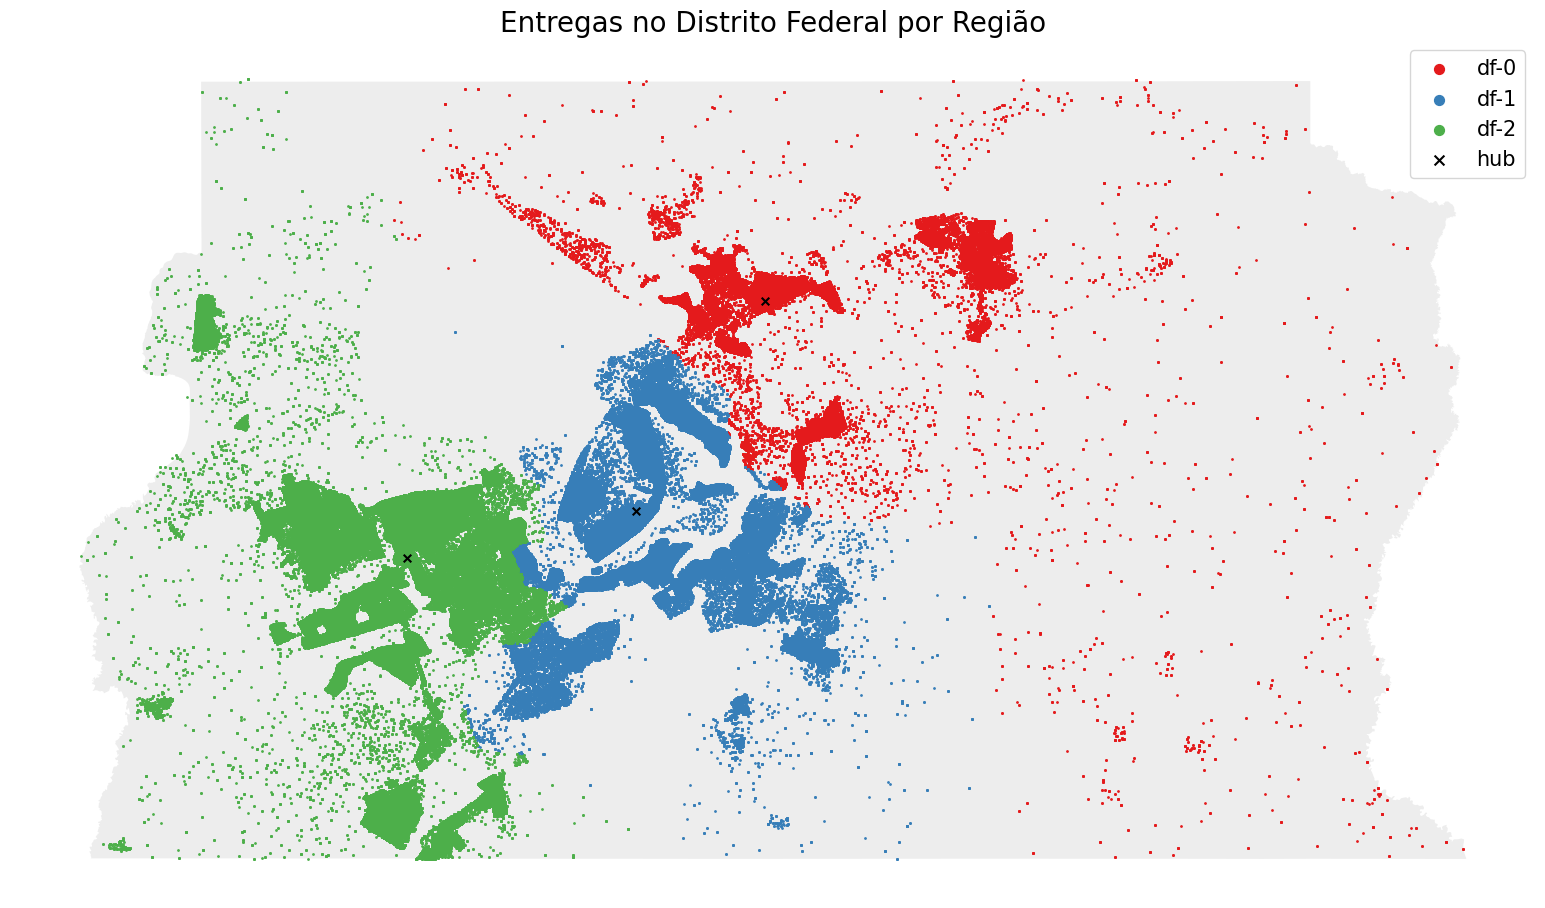

In [ ]:

#paleta de cores
cores = plt.get_cmap('Set1').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)


# criar um plot vazio
fig, ax = plt.subplots(figsize=(50/2.54, 50/2.54))


# plot mapa do DF
mapa.plot(ax=ax, alpha=0.4, color='lightgrey')

# plot Entregas
geo_deliveries_df.query('region == "df-0"').plot(ax=ax, markersize=1, label='df-0')
geo_deliveries_df.query('region == "df-1"').plot(ax=ax, markersize=1, label='df-1')
geo_deliveries_df.query('region == "df-2"').plot(ax=ax, markersize=1, label='df-2')

# plot Hubs
geo_hub_df.plot(ax=ax, markersize=30, marker='x', color='black', label='hub')

# plot da Legenda
plt.title('Entregas no Distrito Federal por Região', fontdict={'fontsize': 20})
lgnd = plt.legend(prop={'size': 15})

# Edição do grafico
plt.box(False)
plt.yticks([])
plt.xticks([])


for handle in lgnd.legendHandles:
  handle.set_sizes([50])




- **Insights**:

- O que podemos ver no mapa acima que as **entrega** estão bem proximas do seu **hub** de origem.
- A mais entregas espalhadas principalmente na area rural ou mais afastada do centro, nos **hubs** das regiões 0 e 2, podendo gerar mais custo e tempo para empresa devido a longa distância das entregas.


#### **5.2 Gráfico de Entregas por região**

- **Agragação**

In [ ]:
data = pd.DataFrame(deliveries_df[['region', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.rename(columns={'proportion': 'percent_region'}, inplace=True)
data

,region,vehicle_capacity,percent_region
0,df-1,180,0.468707
1,df-2,180,0.432102
2,df-0,180,0.099190


- **Visualização**





Text(0, 0.5, 'Proporção')

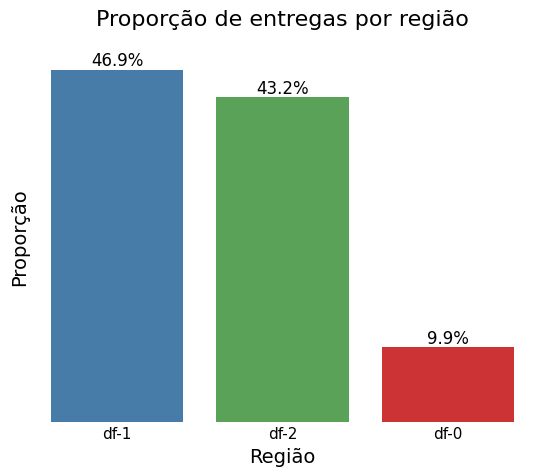

In [ ]:
# Cores da paleta Set1
cores_regiao = {'df-0': '#e41a1c', 'df-1': '#377eb8', 'df-2': '#4daf4a'}
# Ordena o grafico do maior para o menor
ordem = data.groupby('region')['percent_region'].sum().sort_values(ascending=False).index

# Criar o gráfico de barras
grafico = sns.barplot(data=data, x='region', y='percent_region', hue='region', palette=[cores_regiao [regiao] for regiao in data['region']], order=ordem)

# Adicionar rótulos com os valores de porcentagem nas barras
for p in grafico.patches:
    height = p.get_height()
    grafico.annotate(f'{height:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Tira o box; Tira o tick e numeração do eixo y; tira só o tick do eixo X
plt.box(False)
plt.yticks([])
plt.tick_params(axis='x', length=0)

grafico.set_title('Proporção de entregas por região', fontdict={'fontsize': 16}, y=1.05)
grafico.set_xlabel('Região', fontdict={'fontsize': 14})
grafico.set_ylabel('Proporção', fontdict={'fontsize': 14})


- **Insights**:

- O que temos no gráfico acima é a representação de proporção de **entrega** por **região**. Visualizando ele podemos perceber que um pouco mais de 90% das **entregas** estão estão concentradas nos **hubs** das regiões 1 e 2 e menos de 10% está no **hub** da região 0. No entando a capacidade de veículos é a mesma para todos os **hubs**.

- Nesse caso é preciso indentificar se a mesmo a necessidade de ter a mesma capacidade de veículos  para o **hub** 0, onde pelo mapa mostrado podemos ver que é a região onde possui maior deslocamento de entrega. Essa questão pode tambem afetar a necessidade do cliente em uma entrega rápida, se tirar mais vículos do centro. Se não ouver a demanda de veículos para o **hub** 0, poderia deslocar esses veículos para regiões de maior tráfego.

#### **5.3 Gráfico Total de Tamanho da Entrega por região**

- **Agragação**

 tamanho que a entrega ocupa no veículo por região

In [ ]:
deliveries_df.head()


,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,deliveries_size,deliveries_lng,deliveries_lat
0,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.749662,-15.658793
1,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.758876,-15.651440
2,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,7,-47.755019,-15.651207
3,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,3,-47.758785,-15.648706
4,cvrp-0-df-0,df-0,-47.802665,-15.657014,Sobradinho,Sobradinho,180,10,-47.752842,-15.660473


In [ ]:
capacidade_df = deliveries_df.groupby('region')['deliveries_size'].sum().reset_index()
capacidade_df['size_percent'] = (capacidade_df['deliveries_size'] /capacidade_df['deliveries_size'].sum())
capacidade_df

,region,deliveries_size,size_percent
0,df-0,487433,0.099126
1,df-1,2308107,0.469383
2,df-2,2121777,0.431491


- **Visualização**


Text(0, 0.5, 'Quantidade')

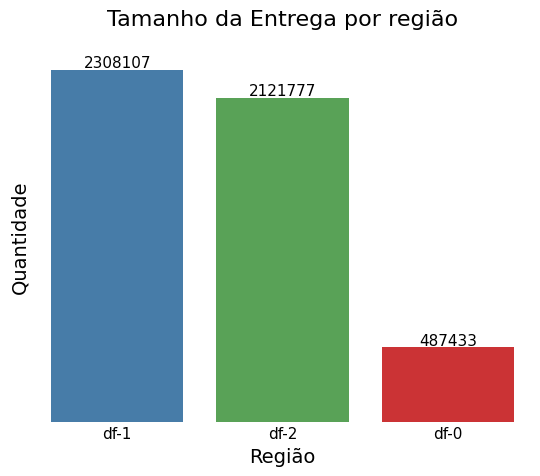

In [ ]:
# Cores da paleta Set1
cores_regiao = {'df-0': '#e41a1c', 'df-1': '#377eb8', 'df-2': '#4daf4a'}
# Ordena o grafico do maior para o menor
ordem = capacidade_df.groupby('region')['deliveries_size'].sum().sort_values(ascending=False).index

# Criar o gráfico de barras
grafico = sns.barplot(data=capacidade_df, x='region', y='deliveries_size', hue='region', order=ordem, palette=[cores_regiao [regiao] for regiao in capacidade_df['region']])

# Adicionando os valores nas barras, removendo o ponto final
for p in plt.gca().patches:
    value = p.get_height()
    value_str = f'{value:.0f}'
    plt.annotate(value_str, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
# Tira o box; Tira o tick e numeração do eixo y; tira só o tick do eixo X
plt.box(False)
plt.yticks([])
plt.tick_params(axis='x', length=0)

grafico.set_title('Tamanho da Entrega por região', fontdict={'fontsize': 16}, y=1.05)
grafico.set_xlabel('Região', fontdict={'fontsize': 14})
grafico.set_ylabel('Quantidade', fontdict={'fontsize': 14})


- **Insights**:

- Se reparamos no **Insight** anterio podemos vizualizar que a porcentagem entre eles estão bem proximos. O leva a suspeitar ja que podemos ver que tamanho das entregas é menor no **hub** 0 em relação aos demais, mesmo a gente não sabendo qual a unidade de medida. Isso pode facilitar o deslocamentos dos veículos para as regiões de alta demanda, ou a troca para veículos com menor capacidade de entrega.